We are going to builda model using convolutional neural networks to classify dogs and cats given their pictures 
with rgb color spectrum

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing import image_dataset_from_directory
import os
from os import listdir
import matplotlib.pyplot as plt

We are going to use the image_data_set_from_directory which will directly classify the classes since the directory
path given are separating cats and dogs, this function returns a tf dataset which we will fit directly since it 
contains the pictures and its label in a tuple which we can feed directly to fit function.
We will split our data into 80/20 for training and validating.

In [14]:
train = image_dataset_from_directory(
    "/Users/fujiemei/Desktop/cats_and_dogs-2/train",
    labels="inferred",
    label_mode="int",
    color_mode="rgb",
    batch_size=64,
    seed=123,
    image_size=(150, 150))

validation = image_dataset_from_directory(
    "/Users/fujiemei/Desktop/cats_and_dogs-2/validation",
    labels="inferred",
    label_mode="int",
    color_mode="rgb",
    batch_size=64,
    seed=123,
    image_size=(150, 150))

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


We can see how are our images here

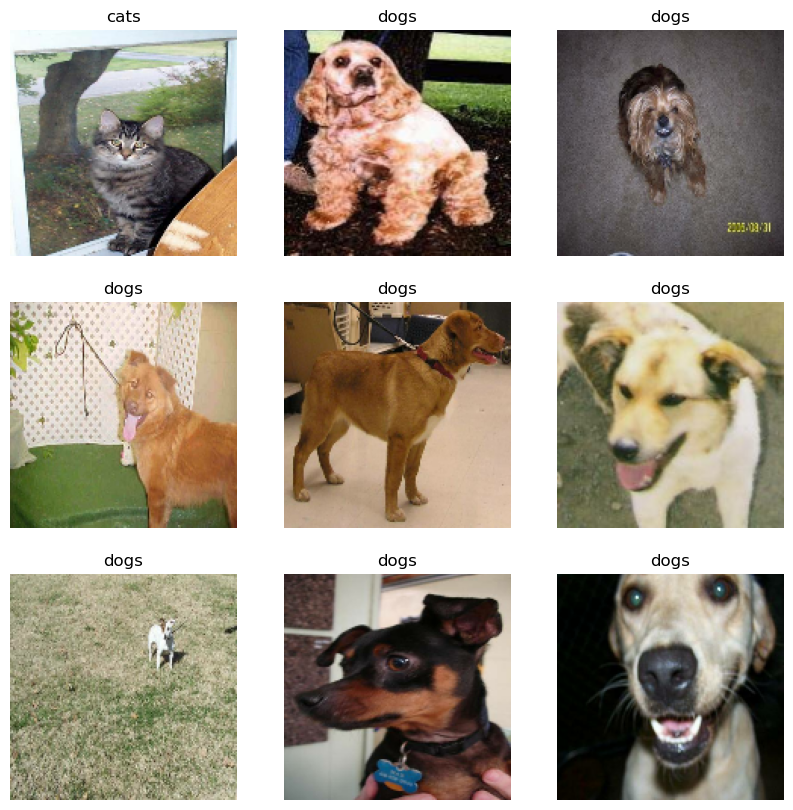

In [15]:
class_names = train.class_names
plt.figure(figsize=(10, 10))
for images, labels in train.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

After a lot of trial and error the best architecure I found that works thebest and steadilty increases the 
accuracy is the following:
    3 convolutional layers with 2*ni filters in each layer with n0=16, with a kernel size of 3x3.
    Max pooling with a 2x2 matrix in each layer.
    Following the convolutional layers, 3 dense layers, the final one with one unit with sigmoid activation, because
    it's a binary classification problem.
The best metrics for training are: Adam optimizer with a learning rate of 0.001, binarycrossentropy loss function
    because of its nature and with 10 epochs.
We'll see now if with 20 epochs the trend continues to improve,but it overfits.

In [20]:
model = Sequential([
    tf.keras.layers.Rescaling(1./255),
    Conv2D(16,(3,3),activation = "relu",input_shape=(150,150,3)),
    MaxPooling2D((2,2)),
    Conv2D(32,(3,3),activation = "relu"),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation = "relu"),
    MaxPooling2D((2,2)),
    Conv2D(128,(3,3),activation = "relu"),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1,activation = "sigmoid")
])
model.compile(loss="binary_crossentropy",
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy"])
history = model.fit(train,validation_data=validation,epochs=20)

Epoch 1/20
32/32 [==============================] - 37s 1s/step - loss: 0.6915 - accuracy: 0.5165 - val_loss: 0.6871 - val_accuracy: 0.6170
Epoch 2/20
32/32 [==============================] - 33s 1s/step - loss: 0.6753 - accuracy: 0.5705 - val_loss: 0.6432 - val_accuracy: 0.6320
Epoch 3/20
32/32 [==============================] - 37s 1s/step - loss: 0.6244 - accuracy: 0.6450 - val_loss: 0.6352 - val_accuracy: 0.6360
Epoch 4/20
32/32 [==============================] - 39s 1s/step - loss: 0.6068 - accuracy: 0.6765 - val_loss: 0.6307 - val_accuracy: 0.6330
Epoch 5/20
32/32 [==============================] - 38s 1s/step - loss: 0.5686 - accuracy: 0.7010 - val_loss: 0.5973 - val_accuracy: 0.6700
Epoch 6/20
32/32 [==============================] - 37s 1s/step - loss: 0.5279 - accuracy: 0.7325 - val_loss: 0.5956 - val_accuracy: 0.6860
Epoch 7/20
32/32 [==============================] - 37s 1s/step - loss: 0.4940 - accuracy: 0.7560 - val_loss: 0.5507 - val_accuracy: 0.7170
Epoch 8/20
32/32 [==

We see that with 20 epochs, this architecture overfits the models, we can see in the graph that around the 7th epoch
the trend between the validation and training sets diverges greatly, so what are we going to try now is adding
a regularizer, after trying batch regularization and dropout,the best results yielded with the code below,with dropout
of 0.4 for the convolutional layer and 0.2 for the dense one.

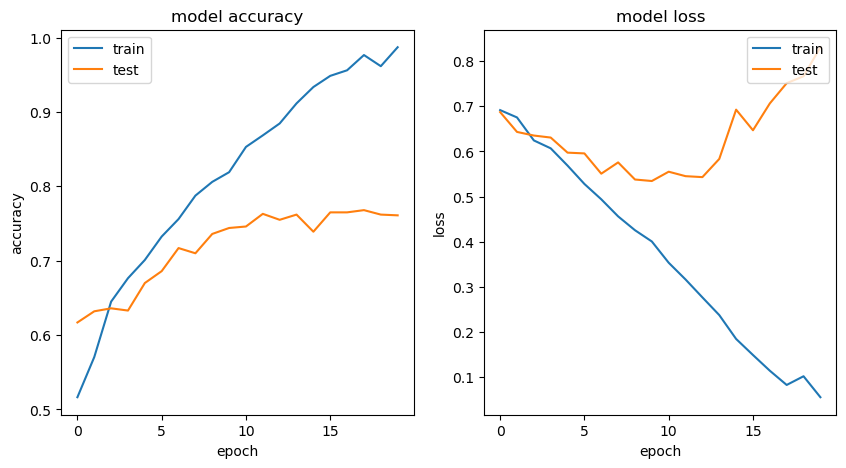

In [21]:
fig, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('model accuracy')
ax[0].set_ylabel('accuracy')
ax[0].set_xlabel('epoch')
ax[0].legend(['train', 'test'], loc='upper left')
ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('model loss')
ax[1].set_ylabel('loss')
ax[1].set_xlabel('epoch')
ax[1].legend(['train', 'test'], loc='upper right')
plt.show()

In [11]:
model = Sequential([
    tf.keras.layers.Rescaling(1./255),
    Conv2D(16,(3,3),input_shape=(150,150,3),activation="relu"),
    MaxPooling2D((2,2)),
    Conv2D(32,(3,3),activation="relu"),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation="relu"),
    MaxPooling2D((2,2)),
    Conv2D(128,(3,3),activation="relu"),
    MaxPooling2D((2,2)),
    Dropout(0.4),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(1,activation = "sigmoid")
])
model.compile(loss="binary_crossentropy",
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy"])
history = model.fit(train,validation_data=validation,epochs=20)

NameError: name 'train' is not defined

In [ ]:
With the architecture above we've obtained the following results, though it's not much better we can see some 
improvement, the graph pattern in accuracy are similar in both and the final results are better overall.
Both the training and validation data are incresing in accuracy and decreasing in loss, even though we haven't 
fixed the problem of overfitting we improved it and this model is a better generalization.

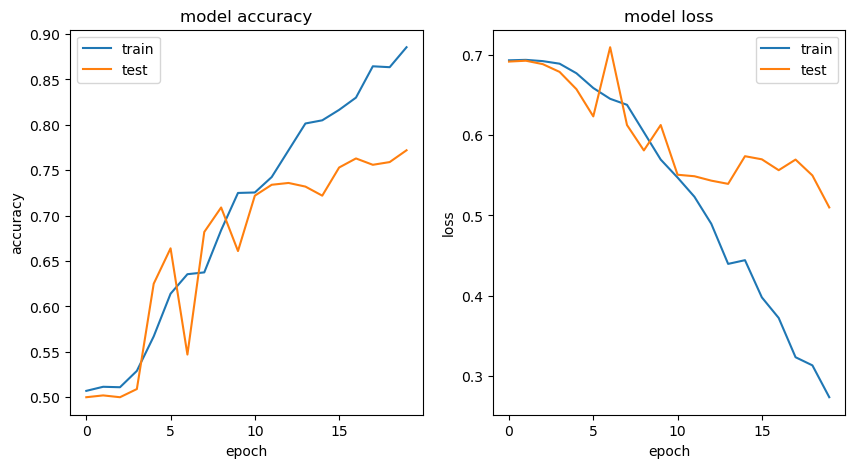

In [29]:
fig, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('model accuracy')
ax[0].set_ylabel('accuracy')
ax[0].set_xlabel('epoch')
ax[0].legend(['train', 'test'], loc='upper left')
ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('model loss')
ax[1].set_ylabel('loss')
ax[1].set_xlabel('epoch')
ax[1].legend(['train', 'test'], loc='upper right')
plt.show()